<a href="https://colab.research.google.com/github/Adrok24/classification-of-plant-diseases/blob/main/predictions_with_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import load_model
from zipfile import ZipFile 
import os
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
#files.download('file.csv')


model = load_model('drive/My Drive/model_with_data_aug.h5')
model.summary()


Mounted at /content/drive
Model: "ResNet101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
resnet101v2 (Functional)     (None, 2048)              42626560  
_________________________________________________________________
layer1_256 (Dense)           (None, 512)               1049088   
_________________________________________________________________
layer3_39 (Dense)            (None, 39)                20007     
Total params: 43,695,655
Trainable params: 1,069,095
Non-trainable params: 42,626,560
_________________________________________________________________


In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Descargamos la imagen de un gato
!wget -nc -O cat.1700.jpg https://drek4537l1klr.cloudfront.net/allaire/Figures/05fig17.jpg

# Imagen de input
img_path = 'cat.1700.jpg'


def reescale_image(picture):

  # Leemos la imagen con tamaño (150, 150)
  img = image.load_img(picture, target_size=(150, 150))

  # La pasamos a array con img_to_array()
  # Le agregamos una dimensión con np.expand_dims() y normalizamos dividiendo por 255
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  return img_tensor

reescaled_image = reescale_image(img_path)


File ‘cat.1700.jpg’ already there; not retrieving.


In [5]:
import json 
  
# Opening JSON file 
with open('drive/My Drive/model_indices.json') as json_file: 
    label_map = json.load(json_file) 


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Background_without_leaves': 4,
 'Blueberry___healthy': 5,
 'Cherry___Powdery_mildew': 6,
 'Cherry___healthy': 7,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8,
 'Corn___Common_rust': 9,
 'Corn___Northern_Leaf_Blight': 10,
 'Corn___healthy': 11,
 'Grape___Black_rot': 12,
 'Grape___Esca_(Black_Measles)': 13,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14,
 'Grape___healthy': 15,
 'Orange___Haunglongbing_(Citrus_greening)': 16,
 'Peach___Bacterial_spot': 17,
 'Peach___healthy': 18,
 'Pepper,_bell___Bacterial_spot': 19,
 'Pepper,_bell___healthy': 20,
 'Potato___Early_blight': 21,
 'Potato___Late_blight': 22,
 'Potato___healthy': 23,
 'Raspberry___healthy': 24,
 'Soybean___healthy': 25,
 'Squash___Powdery_mildew': 26,
 'Strawberry___Leaf_scorch': 27,
 'Strawberry___healthy': 28,
 'Tomato___Bacterial_spot': 29,
 'Tomato___Early_blight': 30,
 'Tomato___Late_blight': 31,
 'Tomato__

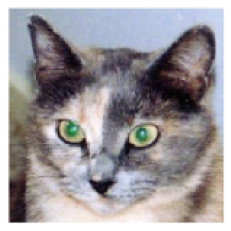

In [21]:
import matplotlib.pyplot as plt

plt.imshow(reescaled_image[0])
plt.axis('off')
plt.show()

In [35]:
y_prob = model.predict(reescaled_image)
y_predicted_class = y_prob.argmax(axis=-1)

def show_prediction(label_map, predicted_index):
  splitter = '__'
  for classification, index in label_map.items():
    if index == predicted_index:  
      if splitter in classification:
        tp,health = classification.split('__', 1)
        print(f'The predicted class is: {tp}, and its state is {health}' )
      else:
        print(classification)


show_prediction(label_map, y_predicted_class)



Background_without_leaves


In [9]:
!wget -nc -O leaf_3.jpg https://ask.extension.org/uploads/question/images/attachments/000/206/826/0E5BCFE0-88B1-4A0E-A639-5A66E9F315D3_original.jpeg?1525662251

--2020-11-22 16:08:11--  https://ask.extension.org/uploads/question/images/attachments/000/206/826/0E5BCFE0-88B1-4A0E-A639-5A66E9F315D3_original.jpeg?1525662251
Resolving ask.extension.org (ask.extension.org)... 52.10.26.123
Connecting to ask.extension.org (ask.extension.org)|52.10.26.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2981937 (2.8M) [image/jpeg]
Saving to: ‘leaf_3.jpg’

leaf_3.jpg          100%[===================>]   2.84M  3.46MB/s    in 0.8s    

2020-11-22 16:08:12 (3.46 MB/s) - ‘leaf_3.jpg’ saved [2981937/2981937]



In [33]:
img_path_2 = 'leaf_3.jpg'

img_tensor_2 = reescale_image(img_path_2)

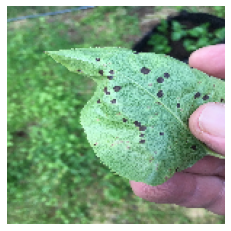

In [41]:
plt.imshow(img_tensor_2[0])
plt.axis('off')
plt.show()

In [42]:
y_prob = model.predict(img_tensor)
y_class = y_prob.argmax(axis=-1)

show_prediction(label_map, y_class)

The predicted class is: Tomato, and its state is _Late_blight
